In [1]:
%matplotlib inline
# %matplotlib notebook

import shapely
import geopandas
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

ox.__version__

'1.7.0'

In [2]:
class bbox:
    def __init__(self, north,south,east,west):
        self.north=north
        self.south=south 
        self.east=east  
        self.west=west

In [3]:
# download/model a street network for some city then visualize it
# G = ox.graph_from_place("Одеса, Україна", network_type="walk")
# fig, ax = ox.plot_graph(G)
# ox.io.save_graphml(G, "Odessa")

In [4]:
G=ox.io.load_graphml("Odessa")

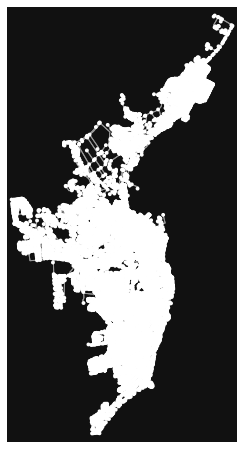

In [5]:
fig, ax = ox.plot_graph(G)

In [ ]:
# Some tests of library functionality

In [6]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
# gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# gdf_nodes.head()

In [7]:
# m = gdf_nodes.explore(color="skyblue", tiles="cartodbdarkmatter")
# gdf_edges.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [8]:
# gdf_edges.head()

In [9]:
# # what sized area does our network cover in square meters?
# G_proj = ox.project_graph(G)
# nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
# graph_area_m = nodes_proj.unary_union.convex_hull.area
# graph_area_m

In [10]:
# # show some basic stats about the network
# ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

In [11]:
# convert graph to line graph so edges become nodes and vice versa
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [12]:
# # color edges in original graph with closeness centralities from line graph
# ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="magma")
# fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [13]:
# # impute missing edge speeds and calculate edge travel times with the speed module
# G1 = ox.speed.add_edge_speeds(G)
# G1 = ox.speed.add_edge_travel_times(G1)

In [14]:
# # get the nearest network nodes to two lat/lng points with the distance module

# orig = ox.distance.nearest_nodes(G, X=30.73827, Y= 46.46852)
# dest = ox.distance.nearest_nodes(G, X=30.80827, Y= 46.50852)

In [15]:
# # find the shortest path between nodes, minimizing travel time, then plot it# find the shortest path between nodes, minimizing travel time, then plot it
# route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [16]:

# # how long is our route in meters?
# edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
# round(sum(edge_lengths))

In [17]:
# paek_tags = {"leisure": "park", "highway": "bus_stop"}
# place = "SoHo, New York, NY"
# gdf_park = ox.features_from_place(place, paek_tags)
# gdf_park.geometry

In [18]:

# features_list=ox.features.features_from_bbox(46.623986, 46.324014, 30.833013, 30.656398, {"tourism":["attraction","artwork"]})
# features_list.size

In [19]:
# box= bbox(north=46.488292,south=46.480293, west=30.728495, east=30.745258)
box= bbox(north=46.486292,south=46.480293, west=30.728495, east=30.745258)
# box= bbox(north=46.486292,south=46.483293, west=30.738495, east=30.745258)
# box= bbox(north=46.486292,south=46.433293,east=30.745258, west=30.698495)

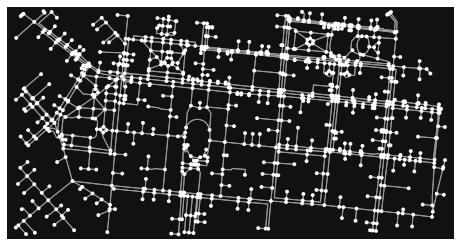

In [20]:
G_box=ox.truncate.truncate_graph_bbox(G,box.north,box.south,box.east,box.west)
fig, ax = ox.plot_graph(G_box,show=False, close=False)

In [21]:
# features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":["attraction","artwork"]})
features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":True})
features_list_box.head()

addr:street  ... heritage
element_type osmid                             ...         
node         2112539230  Дерибасівська вулиця  ...      NaN
             2113415990                   NaN  ...      NaN
             2840964719         Садова вулиця  ...      NaN
             3101942901                   NaN  ...      NaN
             3444516264      Красний провулок  ...      NaN

[5 rows x 68 columns]

In [22]:
# features_list_box.explore()

In [23]:
features_list_box_points=features_list_box[geopandas.GeoDataFrame(map(lambda x: type(x)==shapely.geometry.point.Point, features_list_box["geometry"])).values]
features_list_box_points.head()

addr:street  ... heritage
element_type osmid                             ...         
node         2112539230  Дерибасівська вулиця  ...      NaN
             2113415990                   NaN  ...      NaN
             2840964719         Садова вулиця  ...      NaN
             3101942901                   NaN  ...      NaN
             3444516264      Красний провулок  ...      NaN

[5 rows x 68 columns]

In [24]:
features_list_box_points_x=features_list_box_points["geometry"].x.values
features_list_box_points_y=features_list_box_points["geometry"].y.values
nodes=ox.distance.nearest_nodes(G,features_list_box_points_x,features_list_box_points_y)
nodes
nodes=list(filter(lambda x: x in list(G_box.nodes),nodes))

In [25]:
# path=nx.algorithms.approximation.traveling_salesman_problem(G=G_box,
#                                                             nodes=nodes)
# len(path)

In [26]:
# ox.plot.plot_graph_route(G_box,path)

In [27]:
# route_edges = ox.utils_graph.route_to_gdf(G_box, path)
# m= features_list_box_points.explore( marker_kwds={"radius": 6})
# route_edges.explore(m=m,color="red")

In [28]:
features_list_box_points.explore( marker_kwds={"radius": 6})

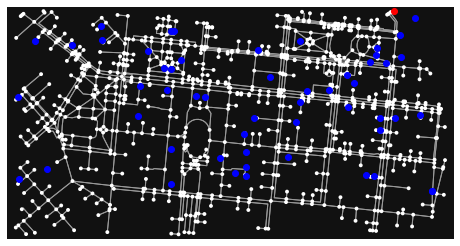

In [29]:
# origin_point_longitude= 46.481293 
# origin_point_latitude= 30.7308495

# destination_point_longitude=46.485792
# destination_point_latitude= 30.743258


origin_point_longitude= 46.453293 
origin_point_latitude= 30.708495

destination_point_longitude=46.486292
destination_point_latitude= 30.743258


# origin_point_longitude= 46.485885
# origin_point_latitude= 30.745150

# destination_point_longitude=46.436292
# destination_point_latitude= 30.703258




fig, ax = ox.plot_graph(G_box,show=False, close=False)
ax.scatter(origin_point_latitude,origin_point_longitude, c='green')
ax.scatter(destination_point_latitude,destination_point_longitude, c='red')
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [30]:
origin=ox.distance.nearest_nodes(G_box, origin_point_latitude,origin_point_longitude)
destination=ox.distance.nearest_nodes(G_box, destination_point_latitude,destination_point_longitude)

In [31]:
# Negative weights???

path_orig_dest_fast=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination,weight="length")
len(path_orig_dest_fast)

57

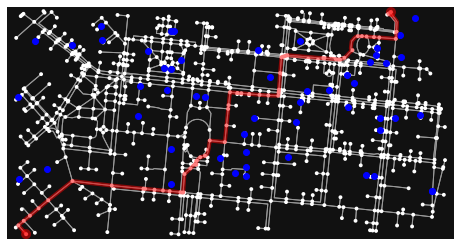

In [32]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest_fast,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [33]:
def gauss_filter(x,y,p1,p2, sigma):
    # return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))/(2*np.pi*(sigma*sigma))
    return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))

In [34]:
def attribute_value_func(point):
    return 1

# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=6, k_local=1e3,k_wide=0,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=0,k_wide=1e1,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e1,k_wide=1e0,default_value=0,improving_attr=True):
def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):
    attr_dict={n:{name_attr1:default_value} for n in G1.nodes}
    for n in G1.nodes:
        for i in range(len(points1)):
            point=points1.iloc[i]
            point_x=point.geometry.x
            point_y=point.geometry.y
            addition_value=attribute_value_func(point)*(gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_local)*k_local
                                    +gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_wide)*k_wide)
            if improving_attr:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]-addition_value
            else:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+addition_value
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])       
        for n in G1.nodes:
            attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+abs(min_attr_dict)
    return attr_dict

In [35]:
# minimizing "non-interestigness"
# improving_attr= TRUE FOR THOUSE IMPROVING, IF THE VALUES OF NODES USES FOR COMPUTATION, NOT OF EDGES
interestingness_attr=get_nodes_attributes(G_box,features_list_box_points,"interestingness_attr", improving_attr=False)
nx.set_node_attributes(G_box,interestingness_attr)
# G_box.nodes[10980542]

In [36]:
# bb=nx.betweenness_centrality(G_box)
# nx.set_node_attributes(G_box,bb,'betweenness')
# G_box.nodes[10980542]

In [37]:
# [G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]

In [38]:
print(max([G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]),min([G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]))

170.02482062692835 0.43553907510575907


In [39]:
# G_box.edges[(10980542, 4439629602, 0)]

In [40]:
# G_box[10980542][4439629602]

In [41]:
def get_edges_attributes(G1,name_attr1,k_length=0.2,k_attr=0.8,improving_attr=True):
    attr_dict={edge:{name_attr1:0} for edge in G1.edges}
    for edge in G1.edges:
        # IF DIGRAF
        attr_dict[edge][name_attr1]=k_length*G1.edges[edge]["length"]
        # IF NOT DIRECTED GRAF:
        # max_val=max(G1.nodes[edge[1]]["danger_attr"],G1.nodes[edge[0]]["danger_attr"])
        # attr_dict[edge][name_attr1]=max_val*k_attr+k_length*G1.edges[edge]["length"]
        if improving_attr:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]-G1.nodes[edge[1]]["interestingness_attr"]*k_attr
        else:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]+G1.nodes[edge[1]]["interestingness_attr"]*k_attr
            # Attempts to prevent preference for short edges 
          # attr_dict[edge][name_attr1]=  ((attr_dict[edge][name_attr1])**(1/2))*G1.nodes[edge[1]]["interestingness_attr"]*k_attr
          # attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]*(1+G1.nodes[edge[1]]["interestingness_attr"]*k_attr)
            

    
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])
        for edge in G1.edges:
            attr_dict[edge][name_attr1]=attr_dict[edge][name_attr1]+abs(min_attr_dict)
    return attr_dict
    

In [42]:
interestingness_attr_edge=get_edges_attributes(G_box,"weight",improving_attr=True)
nx.set_edge_attributes(G_box,interestingness_attr_edge)
# G_box.edges[(10980542, 4439629602, 0)]

In [43]:
# [G_box.edges[e]["weight"] for e in G_box.edges]

In [44]:
def dist_euclidean(a, b):
    x1=G_box.nodes[a]["x"]
    x2=G_box.nodes[b]["x"]
    y1= G_box.nodes[a]["y"]
    y2=G_box.nodes[b]["y"]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    # return 0

In [45]:
path_orig_dest=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination, weight="weight",heuristic=dist_euclidean)
len(path_orig_dest)

41

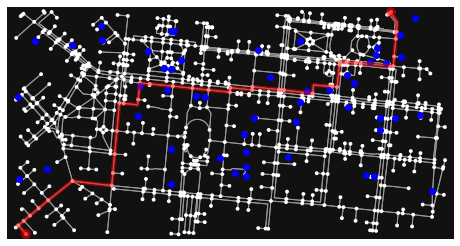

In [46]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [47]:
# Taking into account negative interestingness may lead to some fair results.
nodes_coord=ox.utils_graph.graph_to_gdfs(G_box, edges=False, node_geometry=False)[["x", "y"]]
nodes_coord.head()

,x,y
osmid,,
10980542,30.732246,46.481606
10980543,30.738449,46.481192
10980544,30.738646,46.482631
10980545,30.740532,46.481082
27128847,30.742624,46.480927


In [48]:
# # from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()

# # ax = Axes3D(fig)

# ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(nodes_coord["x"].values, nodes_coord["y"].values, inter_nodes, label='interestingness')
# ax.set_title("3D plot")
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')
# ax.set_zlabel('z-axis')
# plt.show()

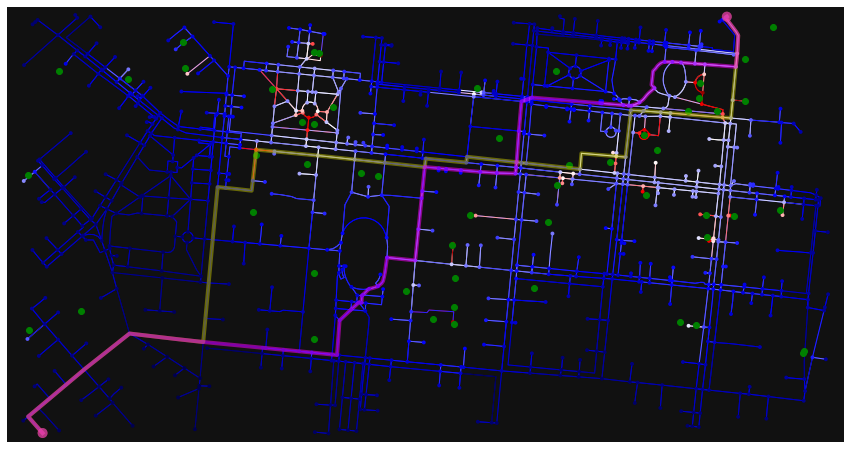

(<Figure size 1080x1080 with 1 Axes>, <Axes: >)

In [49]:

fig, ax = ox.plot.plot_graph(G_box,
                             # node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic_r'),
                             node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic'),
                   edge_color=ox.plot.get_edge_colors_by_attr(G_box, "weight",cmap='seismic_r'),
                             figsize=(15,15),show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='g')

# colormap=plt.cm.seismic
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# plt.colorbar(sm,ax=ax)
# fig.set_facecolor('#161616')

ox.plot.plot_graph_route(G_box,path_orig_dest,route_color="y",ax=ax,show=False, close=False)
ox.plot.plot_graph_route(G_box,path_orig_dest_fast,route_color="magenta",ax=ax)

In [50]:
# path_orig_dest_edges=[(path_orig_dest[i],path_orig_dest[i+1])for i in range(len(path_orig_dest)-1)]

In [51]:
path_circular=nx.algorithms.approximation.traveling_salesman_problem(G=G_box, weight="weight",
                                                            nodes=nodes[0:1]+nodes[12:17], method=nx.algorithms.approximation.asadpour_atsp,
                                                                     cycle=False)
# len(path_circular)

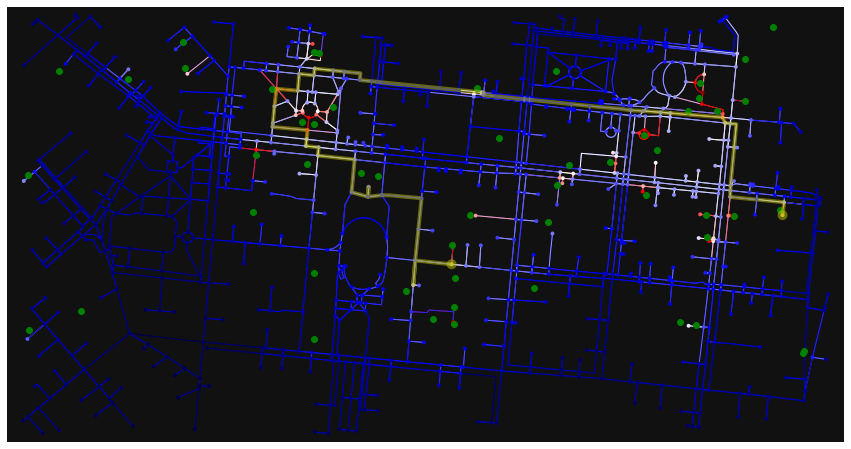

(<Figure size 1080x1080 with 1 Axes>, <Axes: >)

In [52]:
fig, ax = ox.plot.plot_graph(G_box,
                             node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic'),
                   edge_color=ox.plot.get_edge_colors_by_attr(G_box, "weight",cmap='seismic_r'),
                             figsize=(15,15),show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='g')

# colormap=plt.cm.seismic
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# plt.colorbar(sm,ax=ax)
# fig.set_facecolor('#161616')

ox.plot.plot_graph_route(G_box,path_circular,route_color="y",ax=ax)